# Grouping

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [18]:
#Get the sum sales for grouped by store
store_sum = df.groupby('Store').sum()
store_sum.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3766,3716854,440523,781,360,193
2,3766,3883858,457855,784,360,167
3,3766,5408261,584310,779,360,170
4,3766,7556507,1036254,784,360,173
5,3766,3642818,418588,779,360,172


In [19]:
store_plot = store_sum.reset_index().head(10)

In [20]:
store_plot.sort_values(by='Sales', ascending=False)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
3,4,3766,7556507,1036254,784,360,173
6,7,3766,6930202,745569,786,360,159
2,3,3766,5408261,584310,779,360,170
8,9,3766,5112061,451677,779,360,170
9,10,3766,4365642,465661,784,360,209
7,8,3766,4342857,516027,784,360,159
5,6,3766,4297758,495483,780,360,172
1,2,3766,3883858,457855,784,360,167
0,1,3766,3716854,440523,781,360,193
4,5,3766,3642818,418588,779,360,172


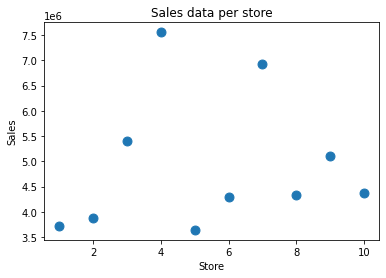

In [21]:
store_plot.plot.scatter('Store', 'Sales', title= 'Sales data per store', ylabel='Sales', s= 80, layout=(10,10))

# Show plot
plt.show()

# Multiple groups

In [22]:
store = df.groupby(['Store', 'DayOfWeek'], as_index=False).sum().head(10)
store

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,662780,76081,128,72,30
1,1,2,627874,73625,134,72,31
2,1,3,601354,71605,132,72,31
3,1,4,552772,66610,124,72,30
4,1,5,609716,72530,129,72,31
5,1,6,662358,80072,134,0,20
6,1,7,0,0,0,0,20
7,2,1,775930,84771,128,72,32
8,2,2,719473,81204,134,72,33
9,2,3,770213,95502,132,72,33


<AxesSubplot:xlabel='Store'>

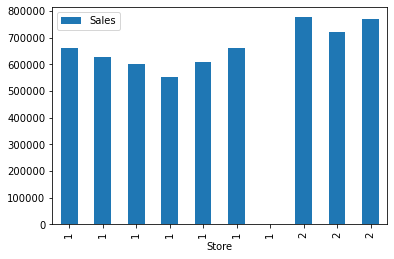

In [23]:
store.plot.bar('Store', 'Sales')

# Continius group

In [24]:
df.groupby('Sales').sum()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday
Sales,,,,,,
0,96543358,1094783,8,54,11205,18276
46,652,6,8,1,0,0
124,898,6,13,1,0,0
133,1093,1,18,1,1,0
286,863,7,40,1,0,0
...,...,...,...,...,...,...
38037,57,1,1970,1,1,0
38367,262,4,5192,1,0,1
38484,262,5,5458,1,1,0


In [25]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]

In [26]:
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df['Salesgroup'] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Salesgroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [27]:
df.groupby(['Store', 'Salesgroup']).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store Salesgroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

# Intellogent imputation

In [31]:
dfo = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
dfo.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['sum', 'mean', 'max', 'min'], 'Customers': ['sum', 'mean', 'max', 'min']})

Sales                           Customers                    \
                    sum         mean    max   min       sum        mean   max   
Store DayOfWeek                                                                 
1     1          662780  4946.119403   9528     0     76081  567.768657  1130   
      2          627874  4650.918519   7959     0     73625  545.370370   957   
      3          601354  4454.474074   7821     0     71605  530.407407   828   
      4          552772  4094.607407   7785     0     66610  493.407407   902   
      5          609716  4516.414815   8414     0     72530  537.259259   895   
...                 ...          ...    ...   ...       ...         ...   ...   
1115  3          764931  5666.155556  10547     0     52248  387.022222   598   
      4          728542  5396.607407  11033     0     50225  372.037037   705   
      5          838199  6208.881481  11673     0     57310  424.518519   663   
      6          907634  6773.388060  10898  4497     64715  482.947761   717   
      7               0     0.000000      0     0         0    0.000000     0   

                      
                 min  
Store DayOfWeek       
1     1            0  
      2            0  
      3            0  
      4            0  
      5            0  
...              ...  
1115  3            0  
      4            0  
      5            0  
      6          329  
      7            0  

[7805 rows x 8 columns]

In [57]:
def mc_uncert2(x):
    return np.std(x) / np.sqrt(x.size)

dfa = dfo.groupby(['Store', 'DayOfWeek'])
dfa.agg(
    Salesmean = ('Sales', 'sum'),
    Salesuncert= ('Sales', mc_uncert2)).reset_index().head()

,Store,DayOfWeek,Salesmean,Salesuncert
0,1,1,662780,139.120367
1,1,2,627874,94.412423
2,1,3,601354,97.225056
3,1,4,552772,129.367657
4,1,5,609716,113.495466
